<a id="goal"></a>
## Project Description and Goal

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from scipy.stats import mannwhitneyu
import numpy as np
from scipy.stats import shapiro

In [2]:
call.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
message.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Conclusion

<font color="blue">There are five datasets:
   -  The users table (data on users) with 8 columns and 500 rows.
   -  The calls table (data on calls) with 4 columns and 137735 rows.
   -  The messages table (data on texts) with 3 columns and 76051 rows.
   -  The internet table (data on web sessions) with 4 columns and 104825 rows.
   -  The plans table (data on the plans) with 8 columns and 2 rows.
    
There are missing values in the table users only in the column `churn_date`, and in other tables, missing values are not seen.

<a id="preprocessing"></a>
## Step 2. Data preprocessing

### Data type replacement

In [12]:
call['call_date']=pd.to_datetime(call['call_date'], format='%Y-%m-%d')

In [13]:
message['message_date']=pd.to_datetime(message['message_date'], format='%Y-%m-%d')

In [14]:
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [15]:
call['user_id']=call['user_id'].astype('object')

In [16]:
internet['user_id']=internet['user_id'].astype('object')

In [17]:
message['user_id']=message['user_id'].astype('object')

In [18]:
users['user_id']=users['user_id'].astype('object')

In [19]:
import math
def rounding(row):
    duration=row['duration']
    return int(math.ceil(duration))


In [20]:
# df.c=df.c.apply(lambda x:int(math.ceil(x)))

In [21]:
call['duration']=call.apply(rounding,axis=1)
call.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


In [22]:
call['duration'].describe()

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

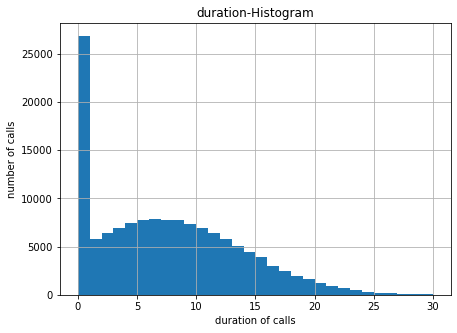

In [23]:
call.hist('duration',bins=30 ,range=(0,30), figsize=(7,5))
plt.title('duration-Histogram')
plt.xlabel('duration of calls')
plt.ylabel('number of calls')
plt.show()

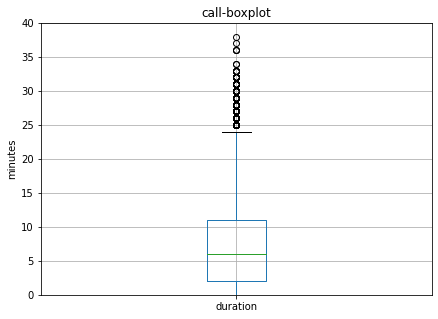

In [24]:
call.boxplot('duration',figsize=(7,5))
plt.ylim(0,40)
plt.ylabel('minutes')
plt.title('call-boxplot')
plt.show()

In [25]:
len(call.query('duration==0'))/len(call)*100

19.482339274694162

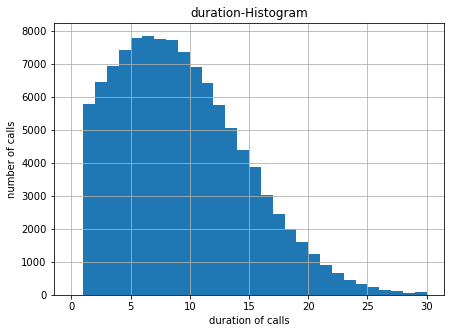

In [26]:
call.query('duration>0').hist('duration',bins=30 ,range=(0,30), figsize=(7,5))
plt.title('duration-Histogram')
plt.xlabel('duration of calls')
plt.ylabel('number of calls')
plt.show()

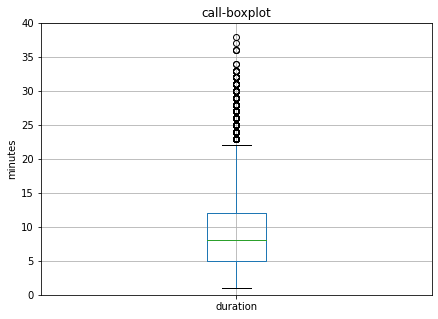

In [27]:
call.query('duration>0').boxplot('duration', figsize=(7,5))
plt.ylim(0,40)
plt.ylabel('minutes')
plt.title('call-boxplot')
plt.show()

In [28]:
call.query('duration>0')['duration'].describe()

count    110901.000000
mean          8.875907
std           5.355181
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

In [29]:
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

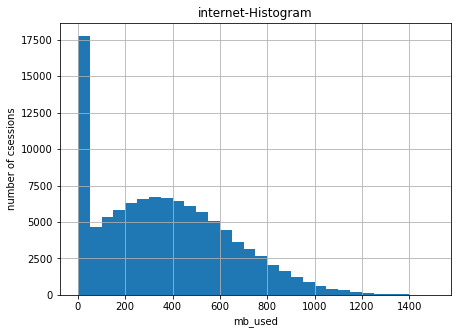

In [30]:
internet.hist('mb_used',bins=30 ,range=(0,1500), figsize=(7,5))
plt.title('internet-Histogram')
plt.xlabel('mb_used')
plt.ylabel('number of csessions')
plt.show()

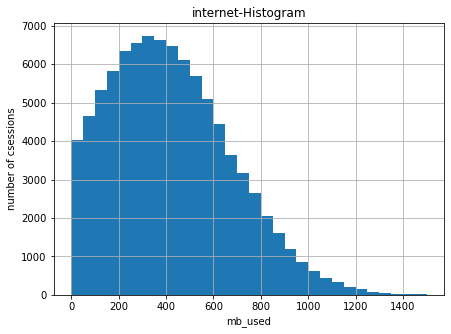

In [31]:
internet.query('mb_used>0').hist('mb_used',bins=30 ,range=(0,1500),figsize=(7,5))
plt.title('internet-Histogram')
plt.xlabel('mb_used')
plt.ylabel('number of csessions')
plt.show()

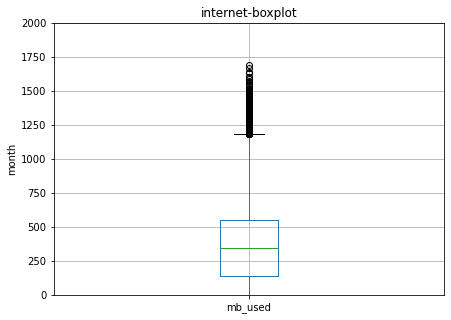

In [32]:
internet.boxplot('mb_used',figsize=(7,5))
plt.ylim(0,2000)
plt.ylabel('month')
plt.title('internet-boxplot')
plt.show()

In [33]:
internet.query('mb_used>0')['mb_used'].describe()

count    91078.000000
mean       422.064206
std        255.063501
min          0.010000
25%        223.380000
50%        395.905000
75%        588.367500
max       1693.470000
Name: mb_used, dtype: float64

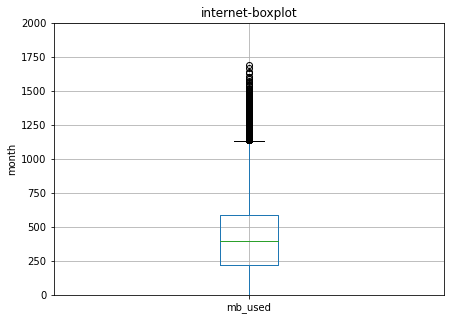

In [34]:
internet.query('mb_used>0').boxplot('mb_used',figsize=(7,5))
plt.ylim(0,2000)
plt.ylabel('month')
plt.title('internet-boxplot')
plt.show()

In [35]:
len(internet.query('mb_used==0'))/len(internet)*100

13.11423801574052

In [36]:
call['month']=pd.DatetimeIndex(call['call_date']).month

In [37]:
call.head(5)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


In [38]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month
internet.head(5)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [39]:
message['month']=pd.DatetimeIndex(message['message_date']).month
message.head(5)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [40]:
call2=call.query('duration>0')

In [41]:
call2_group=call2.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum']).reset_index()

In [42]:
call2_group.columns=['user_id','month','number_of _calls','duration']
call2_group.head(5)

,user_id,month,number_of _calls,duration
0,1000,12,16,124
1,1001,8,22,182
2,1001,9,38,315
3,1001,10,47,393
4,1001,11,49,426


In [43]:
internet2=internet.query('mb_used>0')

In [44]:
internet2_group=internet2.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum').reset_index()

In [45]:
internet2_group.columns=['user_id','month','internet']
internet2_group.head(5)

,user_id,month,internet
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [46]:
def rounding2(row):
    mb_used=row['internet']
    gb_used=mb_used/1000
    return int(math.ceil(gb_used))

In [47]:
internet2_group['internet']=internet2_group.apply(rounding2,axis=1)
internet2_group

,user_id,month,internet
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,23
4,1001,11,19
...,...,...,...
2272,1498,12,24
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [48]:
message_group=message.pivot_table(index=['user_id','month'], values='id', aggfunc='count').reset_index()

In [49]:
message_group.columns=['user_id','month','messages']
message_group.head(5)

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [50]:
len(call2_group)

2256

In [51]:
len(internet2_group)

2277

In [52]:
len(message_group)

1806

In [53]:
total1= pd.merge(left = internet2_group , 
                right = call2_group, how='outer',on=['user_id', 'month']).fillna(0)
total2=pd.merge(left = total1 , 
                right = message_group, how='outer',on=['user_id', 'month']).fillna(0)

In [54]:
total2.head(10)

,user_id,month,internet,number_of _calls,duration,messages
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,22.0,182.0,30.0
2,1001,9,14.0,38.0,315.0,44.0
3,1001,10,23.0,47.0,393.0,53.0
4,1001,11,19.0,49.0,426.0,36.0
5,1001,12,20.0,46.0,412.0,44.0
6,1002,10,7.0,8.0,59.0,15.0
7,1002,11,20.0,48.0,386.0,32.0
8,1002,12,15.0,38.0,384.0,41.0
9,1003,12,28.0,118.0,1104.0,50.0


In [55]:
len(total2)

2293

In [56]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [57]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


In [58]:
users_group=users.pivot_table(index='user_id', values=['plan','reg_date','churn_date'], aggfunc='first').reset_index()

In [59]:
users_group.head(5)

,user_id,churn_date,plan,reg_date
0,1000,NaN,ultimate,2018-12-24
1,1001,NaN,surf,2018-08-13
2,1002,NaN,surf,2018-10-21
3,1003,NaN,surf,2018-01-28
4,1004,NaN,surf,2018-05-23


In [60]:
data= pd.merge(left = total2 , right = users_group, how='left',on='user_id')

In [61]:
data.head(5)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date
0,1000,12,2.0,16.0,124.0,11.0,NaN,ultimate,2018-12-24
1,1001,8,7.0,22.0,182.0,30.0,NaN,surf,2018-08-13
2,1001,9,14.0,38.0,315.0,44.0,NaN,surf,2018-08-13
3,1001,10,23.0,47.0,393.0,53.0,NaN,surf,2018-08-13
4,1001,11,19.0,49.0,426.0,36.0,NaN,surf,2018-08-13


In [62]:
def cost(row):
    
    plan=row['plan']
    internet=row['internet']
    duration=row['duration']
    message=row['messages']
    

    if plan=='surf':
        
        monthly_income=20
        
        if internet>15:
            internet_cost=(internet-15)*10
        else:
            internet_cost=0
    
    
        if duration>500:
            call_cost=(duration-500)*0.03
        else:
            call_cost=0
    
        if message>50:
            message_cost=(message-50)*0.03
        else:
            message_cost=0
            
        
    elif plan=='ultimate':
        
        monthly_income=70
        
        if internet>30:
            internet_cost=(internet-30)*7
        else:
            internet_cost=0
    
    
        if duration>3000:
            call_cost=(duration-3000)*0.01
        else:
            call_cost=0
    
        if message>1000:
            message_cost=(message-1000)*0.01
        else:
            message_cost=0
     
    total_cost= monthly_income +internet_cost+ call_cost+ message_cost
    return total_cost

In [63]:
data['revenue']=data.apply(cost, axis=1)
data.head(5)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue
0,1000,12,2.0,16.0,124.0,11.0,NaN,ultimate,2018-12-24,70.00
1,1001,8,7.0,22.0,182.0,30.0,NaN,surf,2018-08-13,20.00
2,1001,9,14.0,38.0,315.0,44.0,NaN,surf,2018-08-13,20.00
3,1001,10,23.0,47.0,393.0,53.0,NaN,surf,2018-08-13,100.09
4,1001,11,19.0,49.0,426.0,36.0,NaN,surf,2018-08-13,60.00


In [64]:
data['month_reg']=pd.DatetimeIndex(data['reg_date']).month

In [65]:
data['month_churn']=pd.DatetimeIndex(data['churn_date']).month
data.head(5)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn
0,1000,12,2.0,16.0,124.0,11.0,NaN,ultimate,2018-12-24,70.00,12,NaN
1,1001,8,7.0,22.0,182.0,30.0,NaN,surf,2018-08-13,20.00,8,NaN
2,1001,9,14.0,38.0,315.0,44.0,NaN,surf,2018-08-13,20.00,8,NaN
3,1001,10,23.0,47.0,393.0,53.0,NaN,surf,2018-08-13,100.09,8,NaN
4,1001,11,19.0,49.0,426.0,36.0,NaN,surf,2018-08-13,60.00,8,NaN


In [66]:
data.query('month_reg>month')

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn


In [67]:
data.query('month_churn<month_reg')

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn


In [68]:
data.query('month_churn<month').head(10)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn
54,1012,12,12.0,12.0,78.0,0.0,2018-11-16,surf,2018-06-28,20.00,6,11.0
80,1022,10,19.0,69.0,574.0,0.0,2018-09-07,surf,2018-04-20,62.22,4,9.0
81,1022,11,23.0,61.0,498.0,0.0,2018-09-07,surf,2018-04-20,100.00,4,9.0
82,1022,12,19.0,62.0,585.0,0.0,2018-09-07,surf,2018-04-20,62.55,4,9.0
212,1050,11,15.0,49.0,413.0,0.0,2018-10-07,ultimate,2018-03-20,70.00,3,10.0
213,1050,12,18.0,38.0,299.0,0.0,2018-10-07,ultimate,2018-03-20,70.00,3,10.0
311,1067,12,16.0,38.0,344.0,20.0,2018-11-24,surf,2018-09-24,30.00,9,11.0
408,1084,12,28.0,78.0,720.0,81.0,2018-11-11,surf,2018-06-04,157.53,6,11.0
503,1106,12,23.0,61.0,569.0,0.0,2018-11-14,surf,2018-05-10,102.07,5,11.0
829,1172,12,24.0,77.0,711.0,117.0,2018-11-29,surf,2018-03-30,118.34,3,11.0


In [69]:
len(data.query('month_churn<month'))

37

In [70]:
len(data.query('month_churn<month'))/len(data)

0.016136066288704752

In [71]:
len(data)

2293

In [72]:
data=data.query('month_churn=="NaN" or month_churn>=month ')

## Conclusion

<font color="blue"> 
    
**Missing values**
    
In the table users we have only in the column `churn_date` missing values, which is not really missing values, it just means that the user is still using the service. So we do not need to fill in the data.  
    
**Data types**
    
We convert columns related to date into datetime format.
We convert columns `user_id` to object, because they aren't numbers.

For calls, each individual call is rounded up. we round up the duration column.

**Find and eliminate errors in the data**  
    
In the initial data analysis, we see that there is an abnormal peak at zero for the histogram of call duration. They are probably Missed calls. The percentage of this data is about 19%. Although it is a high percentage, because our goal is to calculate and analyze the company's revenue, so the missed calls(0 values) will not affect our analysis. Examining the histogram before and after deleting this data, we see that the general shape of the graph is the same, the consumption peak does not change and only the mean and median increase (the graph moves slightly to the right). So we decide to delete the data.   
    
We see that for the Internet histogram there is also an abnormal peak at zero. They may be due to a mistake in entering information or connecting to the Internet, but the user refuses to continue using. The percentage of this data is about 13%. Although the percentage is high, our goal is to calculate and analyze the company's revenue, so unused Internet (value 0) will not affect our calculations. Examining the histogram before and after deleting this data, we see that the general shape of the chart is the same, the peak consumption does not change and only the mean and median increase (the chart moves slightly to the right). So we decide to delete this data too.  
    
We see that in 37 cases there is data for user consumption while the service usage date has expired! This is illogical data. Although there may be a mistake in entering the data, but because there are not many of them, we can ignore them.    
    
**Merging tables and calculating the average monthley usage and revenue for each user** 
    
Then we first group the tables: call, internet and message, based on the 'user-id' and 'months' of consumption. For web traffic, the total for the month is rounded up, so we round up the internet column. Then merge them together so that we can continue the next calculations.  

In the next step, we calculate the average costs(revenue) for each user based on the plan(surf or ultimate) they used and add them through a new column to the table.    

<a id="surf"></a>
<a id="ultimate"></a>
## Step 3. Analyze the data

In [73]:
data.plan.value_counts()

surf        1548
ultimate     708
Name: plan, dtype: int64

In [74]:
data_surf=data.query('plan=="surf"')
data_surf

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn
1,1001,8,7.0,22.0,182.0,30.0,NaN,surf,2018-08-13,20.00,8,NaN
2,1001,9,14.0,38.0,315.0,44.0,NaN,surf,2018-08-13,20.00,8,NaN
3,1001,10,23.0,47.0,393.0,53.0,NaN,surf,2018-08-13,100.09,8,NaN
4,1001,11,19.0,49.0,426.0,36.0,NaN,surf,2018-08-13,60.00,8,NaN
5,1001,12,20.0,46.0,412.0,44.0,NaN,surf,2018-08-13,70.00,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1470,10,0.0,54.0,459.0,145.0,NaN,surf,2018-04-21,22.85,4,NaN
2288,1470,11,0.0,63.0,632.0,156.0,NaN,surf,2018-04-21,27.14,4,NaN
2289,1470,12,0.0,64.0,592.0,153.0,NaN,surf,2018-04-21,25.85,4,NaN
2290,1484,11,0.0,2.0,38.0,1.0,NaN,surf,2018-11-29,20.00,11,NaN


In [75]:
data_surf.describe()

,user_id,month,internet,number_of _calls,duration,messages,revenue,month_reg,month_churn
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,81.000000
mean,1242.087209,9.146641,17.039406,48.246124,428.804264,31.111757,63.564386,4.866279,10.691358
std,138.559608,2.469950,8.008907,26.013611,235.233380,33.641112,57.362592,2.974935,1.136244
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,9.000000
25%,1120.000000,8.000000,13.000000,31.000000,271.000000,3.000000,20.000000,2.000000,10.000000
50%,1244.000000,10.000000,17.000000,48.000000,425.000000,24.000000,44.050000,4.000000,11.000000
75%,1357.250000,11.000000,21.000000,64.000000,576.000000,47.000000,90.000000,7.000000,12.000000
max,1499.000000,12.000000,71.000000,167.000000,1510.000000,266.000000,600.370000,12.000000,12.000000


In [76]:
data_ultimate=data.query('plan=="ultimate"')
data_ultimate

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn
0,1000,12,2.0,16.0,124.0,11.0,NaN,ultimate,2018-12-24,70.0,12,NaN
19,1006,11,3.0,2.0,10.0,15.0,2018-12-18,ultimate,2018-11-27,70.0,11,12.0
20,1006,12,33.0,7.0,59.0,139.0,2018-12-18,ultimate,2018-11-27,91.0,11,12.0
26,1008,10,18.0,54.0,476.0,21.0,NaN,ultimate,2018-08-03,70.0,8,NaN
27,1008,11,24.0,50.0,446.0,37.0,NaN,ultimate,2018-08-03,70.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2243,1493,10,17.0,52.0,450.0,0.0,NaN,ultimate,2018-03-06,70.0,3,NaN
2244,1493,11,16.0,59.0,500.0,0.0,NaN,ultimate,2018-03-06,70.0,3,NaN
2245,1493,12,16.0,59.0,473.0,0.0,NaN,ultimate,2018-03-06,70.0,3,NaN
2261,1497,12,12.0,42.0,300.0,50.0,NaN,ultimate,2018-12-10,70.0,12,NaN


In [77]:
data_ultimate.describe()

,user_id,month,internet,number_of _calls,duration,messages,revenue,month_reg,month_churn
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,40.000000
mean,1252.562147,9.124294,17.747175,48.617232,430.151130,37.798023,72.748588,4.953390,10.475000
std,151.018730,2.565427,7.896944,26.841756,240.973869,34.896049,12.775244,2.981665,1.632797
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,7.000000
25%,1126.000000,7.000000,13.000000,29.000000,259.000000,7.000000,70.000000,2.000000,10.000000
50%,1237.000000,10.000000,17.000000,48.000000,425.000000,30.000000,70.000000,5.000000,11.000000
75%,1401.000000,11.000000,22.000000,64.000000,565.250000,61.000000,70.000000,7.000000,12.000000
max,1497.000000,12.000000,47.000000,156.000000,1369.000000,166.000000,189.000000,12.000000,12.000000


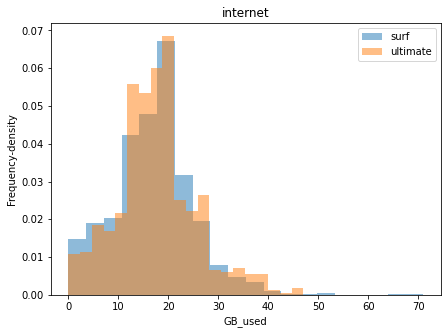

In [78]:
plt.figure(figsize=(7,5))
plt.hist(data_surf['internet'], bins=20 , density=True, alpha=0.5, label='surf')
plt.hist(data_ultimate['internet'],bins=20 , density=True, alpha=0.5, label='ultimate')
plt.title('internet')
plt.xlabel('GB_used')
plt.ylabel('Frequency-density')
plt.legend(loc='upper right')
plt.show()

In [79]:
len(data_surf.query('internet>15'))/len(data_surf)*100

60.52971576227391

In [80]:
len(data_ultimate.query('internet>30'))/len(data_ultimate)*100

6.497175141242938

In [81]:
len(data_ultimate.query('internet>30'))

46

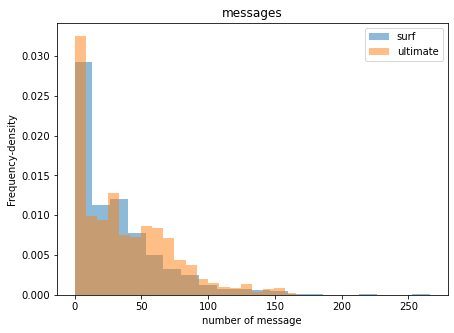

In [82]:
plt.figure(figsize=(7,5))
plt.hist(data_surf['messages'], bins=20 , density=True, alpha=0.5, label='surf')
plt.hist(data_ultimate['messages'],bins=20 , density=True, alpha=0.5, label='ultimate')
plt.title('messages')
plt.xlabel('number of message')
plt.ylabel('Frequency-density')
plt.legend(loc='upper right')
plt.show()

In [83]:
len(data_surf.query('messages>50'))/len(data_surf)*100

21.57622739018088

In [84]:
len(data_surf.query('messages==0'))

345

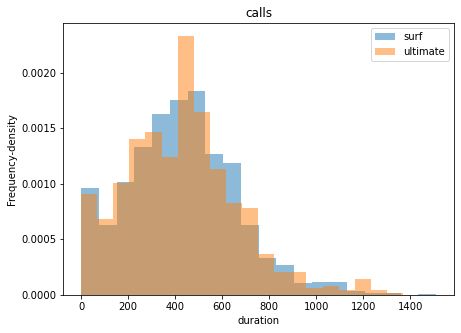

In [85]:
plt.figure(figsize=(7,5))
plt.hist(data_surf['duration'], bins=20 , density=True, alpha=0.5, label='surf')
plt.hist(data_ultimate['duration'],bins=20 , density=True, alpha=0.5, label='ultimate')
plt.title('calls')
plt.xlabel('duration')
plt.ylabel('Frequency-density')
plt.legend(loc='upper right')
plt.show()

In [86]:
len(data_surf.query('duration>500'))/len(data_surf)*100

35.98191214470285

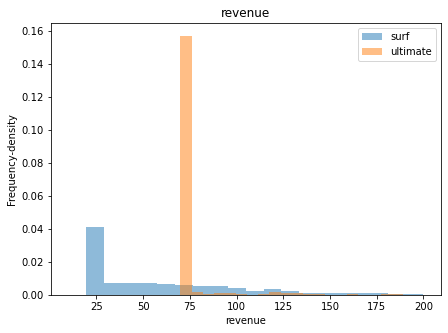

In [87]:
plt.figure(figsize=(7,5))
plt.hist(data_surf['revenue'], bins=20 ,range=(10,200), density=True, alpha=0.5, label='surf')
plt.hist(data_ultimate['revenue'],bins=20 , density=True, alpha=0.5, label='ultimate')
plt.title('revenue')
plt.xlabel('revenue')
plt.ylabel('Frequency-density')
plt.legend(loc='upper right')
plt.show()

In [88]:
len(data_surf.query('revenue==20'))/len(data_surf)*100

26.098191214470283

In [89]:
len(data_ultimate.query('revenue>70'))/len(data_ultimate)*100

6.497175141242938

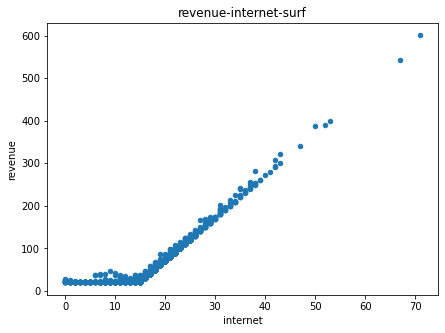

In [90]:
data_surf.plot(x='internet', y='revenue', kind='scatter',figsize=(7,5))
plt.title('revenue-internet-surf')
plt.xlabel('internet')
plt.ylabel('revenue')
plt.show()

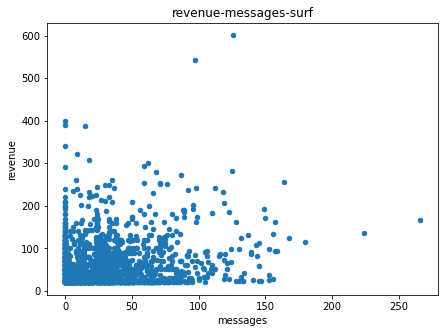

In [91]:
data_surf.plot(x='messages', y='revenue', kind='scatter',figsize=(7,5))
plt.title('revenue-messages-surf')
plt.xlabel('messages')
plt.ylabel('revenue')
plt.show()

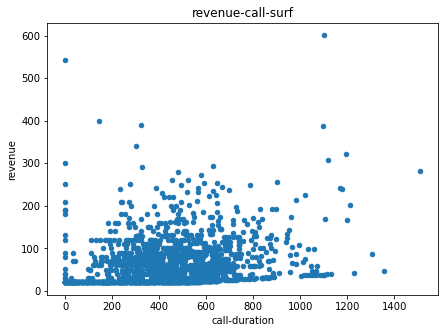

In [92]:
data_surf.plot(x='duration', y='revenue', kind='scatter',figsize=(7,5))
plt.title('revenue-call-surf')
plt.xlabel('call-duration')
plt.ylabel('revenue')
plt.show()

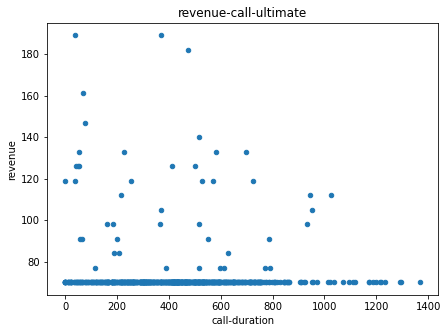

In [93]:
data_ultimate.plot(x='duration', y='revenue', kind='scatter',figsize=(7,5))
plt.title('revenue-call-ultimate')
plt.xlabel('call-duration')
plt.ylabel('revenue')
plt.show()

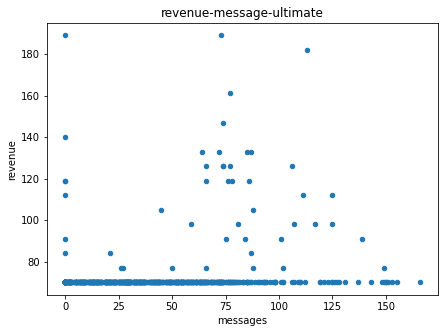

In [94]:
data_ultimate.plot(x='messages', y='revenue', kind='scatter',figsize=(7,5))
plt.title('revenue-message-ultimate')
plt.xlabel('messages')
plt.ylabel('revenue')
plt.show()

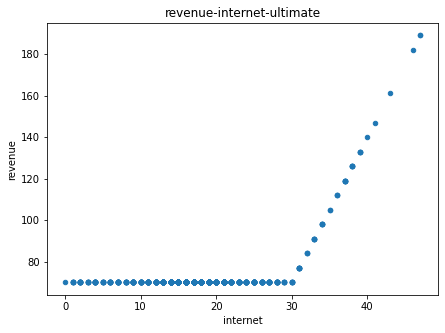

In [95]:
data_ultimate.plot(x='internet', y='revenue', kind='scatter',figsize=(7,5))
plt.title('revenue-internet-ultimate')
plt.xlabel('internet')
plt.ylabel('revenue')
plt.show()

In [96]:
data_surf.corr()

,user_id,month,internet,number_of _calls,duration,messages,revenue,month_reg,month_churn
user_id,1.000000,0.010776,-0.033928,0.029299,0.028180,0.050171,-0.018111,-0.018832,-0.466867
month,0.010776,1.000000,0.153684,0.099590,0.101739,0.161250,0.115535,0.407429,0.535051
internet,-0.033928,0.153684,1.000000,0.370993,0.365491,0.155881,0.898758,-0.097449,0.214656
number_of _calls,0.029299,0.099590,0.370993,1.000000,0.987339,0.240115,0.286762,-0.106657,0.014227
duration,0.028180,0.101739,0.365491,0.987339,1.000000,0.242907,0.283010,-0.105459,0.010570
messages,0.050171,0.161250,0.155881,0.240115,0.242907,1.000000,0.165289,0.039601,-0.030651
revenue,-0.018111,0.115535,0.898758,0.286762,0.283010,0.165289,1.000000,-0.063173,0.175563
month_reg,-0.018832,0.407429,-0.097449,-0.106657,-0.105459,0.039601,-0.063173,1.000000,0.622360
month_churn,-0.466867,0.535051,0.214656,0.014227,0.010570,-0.030651,0.175563,0.622360,1.000000


In [97]:
data_ultimate.corr()

,user_id,month,internet,number_of _calls,duration,messages,revenue,month_reg,month_churn
user_id,1.000000,0.109030,-0.106600,0.006919,0.008327,-0.125045,-0.102249,0.113357,0.233386
month,0.109030,1.000000,0.090430,0.130282,0.133441,0.169304,0.026720,0.431046,0.668767
internet,-0.106600,0.090430,1.000000,0.222022,0.217769,0.345891,0.576115,-0.182215,-0.431771
number_of _calls,0.006919,0.130282,0.222022,1.000000,0.987325,0.241851,-0.066108,0.001244,-0.613450
duration,0.008327,0.133441,0.217769,0.987325,1.000000,0.242914,-0.069511,-0.001555,-0.589335
messages,-0.125045,0.169304,0.345891,0.241851,0.242914,1.000000,0.186650,0.124335,0.315526
revenue,-0.102249,0.026720,0.576115,-0.066108,-0.069511,0.186650,1.000000,-0.095924,-0.066210
month_reg,0.113357,0.431046,-0.182215,0.001244,-0.001555,0.124335,-0.095924,1.000000,0.411328
month_churn,0.233386,0.668767,-0.431771,-0.613450,-0.589335,0.315526,-0.066210,0.411328,1.000000


## Conclusion

<font color="blue"> **Describing the customers' behavior**
    
 **Plan surf**   
    
The number of users in this group are 1548.
    
Most of the data is related to the last months of the year. Either consumption has increased in recent months or more data has been collected.
    
The peak of *monthly internet usage* is between 15 and 20 GB. The median and mean are close to 17 GB and standard deviation is 8(low), the distribution is almost normal.About 60% of users in this group have used more than the Internet limits(15 GB).   

The peak of *monthly call durations* is about 500 minutes per month(16 minutes per day). The median is 425 and the mean is 428 and standard deviation is 235(high). The distribution is skewed to right. About 33% of users in this group have used more than the call limits(500 minutes) .
    
The peak of *monthly messages* is between 25 and 30 messages per month. The mean is 31 and the median is 24 and standard deviation is 33(high). The distribution is skewed to right. A peak consumption is also seen around 0, which indicates people who used other services (Internet or voice calls) but did not send a message. 63 users behaved in this way. About 24% of users in this group have used more than the message limits(50 messages).
    
The peak of *monthly revenue* is 20-30$. 26% of users have used their package limits and 74% more than the limits. The mean is 63, the median 44 and standard deviation is 57(high). The distribution is skewed to right. 

Examining the scatter-plots, we see that for users who have consumed more than the limits, revenue is most affected by Internet consumption. There is a linear dependecy with a correlation of 0.89


**Plan ultimate** 
 
The number of users in this group are 708.
    
Most of the data is related to the last months of the year. Either consumption has increased in recent months or more data has been collected.
    
The peak of *monthly internet usage* is between 15 and 20 GB. The median and mean are close to 17 GB and standard deviation is 7(low), the distribution is almost normal. About 6.38% of users in this group have used more than the Internet limits(30 GB).   

The peak of *monthly call durations* is berween 400 and 500 minutes per month(13 to 16 minutes per day). The median is 424 and the mean is 430 and standard deviation is 240(high). The distribution is skewed to right. None of the users in this group have used more than the call limits(3000 minutes). No one had a call duration more than 1369 minutes!
    
The peak of *monthly messages* is between 25 and 30 messages per month. The mean is 37 and the median is 30 and standard deviation is 34(high). The distribution is skewed to right. A peak consumption is also seen around 0, which indicates people who used other services (Internet or voice calls) but did not send a message. More than 35 users behaved in this way. None of the users in this group have used more than the message limits(1000 messages).No one has sent more than 166 messages!

*Monthly revenue* is 70$. Just 46 users(6.38% of users) have used more than the limits, who needed more than 30 GB volume of data. The mean is 72, median is 70 and standard deviation is 12. The distribution is almost constant.  
    
Examining the scatter-plots, we see that for users who have consumed more than the limits, revenue is most affected by Internet consumption. There is a linear dependecy with a correlation of 0.57    
 

<a id="test"></a>
## Step 4. Test the hypotheses

First hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.

In [98]:
alpha=0.05

In [99]:
sample1=data_surf['revenue']

In [100]:
sample2=data_ultimate['revenue']

In [101]:
stat, p = mannwhitneyu(sample1, sample2)
p

3.456645129799044e-39

In [102]:
if (p<alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

We reject the null hypothesis


<font color="blue"> if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average revenue from users of Ultimate and Surf calling plans differs.

Second hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions

In [103]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [104]:
users_group_city=users.pivot_table(index='user_id', values='city',aggfunc='first').reset_index()

In [105]:
users_group_city

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [106]:
data2= pd.merge(left = data , right = users_group_city, how='left',on='user_id')
data2.head(5)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn,city
0,1000,12,2.0,16.0,124.0,11.0,NaN,ultimate,2018-12-24,70.00,12,NaN,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,7.0,22.0,182.0,30.0,NaN,surf,2018-08-13,20.00,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,14.0,38.0,315.0,44.0,NaN,surf,2018-08-13,20.00,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,23.0,47.0,393.0,53.0,NaN,surf,2018-08-13,100.09,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,19.0,49.0,426.0,36.0,NaN,surf,2018-08-13,60.00,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"


In [107]:
sample3=data2.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
sample3.head(5)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn,city
55,1014,11,2.0,23.0,163.0,9.0,NaN,surf,2018-11-25,20.00,11,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA"
56,1014,12,8.0,125.0,1114.0,64.0,NaN,surf,2018-11-25,38.84,11,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA"
74,1022,5,5.0,32.0,302.0,0.0,2018-09-07,surf,2018-04-20,20.00,4,9.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1022,6,24.0,65.0,490.0,0.0,2018-09-07,surf,2018-04-20,110.00,4,9.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1022,7,10.0,56.0,475.0,0.0,2018-09-07,surf,2018-04-20,20.00,4,9.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [108]:
sample4=data2.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')
sample4.head(5)

,user_id,month,internet,number_of _calls,duration,messages,churn_date,plan,reg_date,revenue,month_reg,month_churn,city
0,1000,12,2.0,16.0,124.0,11.0,NaN,ultimate,2018-12-24,70.00,12,NaN,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,7.0,22.0,182.0,30.0,NaN,surf,2018-08-13,20.00,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,14.0,38.0,315.0,44.0,NaN,surf,2018-08-13,20.00,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,23.0,47.0,393.0,53.0,NaN,surf,2018-08-13,100.09,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,19.0,49.0,426.0,36.0,NaN,surf,2018-08-13,60.00,8,NaN,"Seattle-Tacoma-Bellevue, WA MSA"


In [113]:
sample3_revenue=sample3['revenue']
sample4_revenue=sample4['revenue']

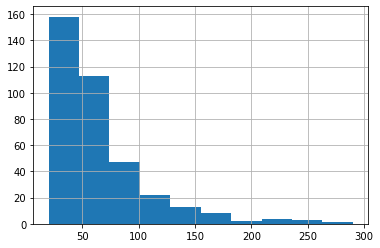

In [115]:
sample3_revenue.hist();

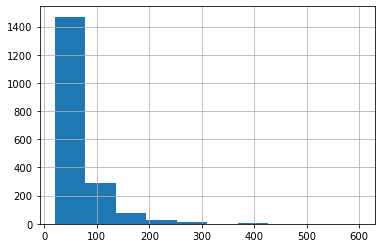

In [116]:
sample4_revenue.hist();

In [117]:
stat, p = shapiro(sample3_revenue)
p

3.291956791665368e-19

In [118]:
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample does not look Normal (reject H0)


In [119]:
stat, p = shapiro(sample4_revenue)
p

0.0

In [120]:
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample does not look Normal (reject H0)


In [121]:
stat, p = mannwhitneyu(sample3_revenue, sample4_revenue)
p

0.007659551252606069

In [122]:
if (p<alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

We reject the null hypothesis


<font color="blue"> if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the distributions are different. It can be claimed that customer behavior in this area is different from other areas.

## Conclusion

<font color="blue"> **First hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.**
    
The average revenue distribution is not normal for Ultimate and Surf calling plans. For 'surf' the distribution is skewed to right and for 'ultimate' the distribution is almost constant. So they probebly have different distributions, but to test the hypothesis, we can use the Mann-Whitney method (determining whether two independent samples were drawn from a population with the same distribution).
    
H0:The average revenue from users of Ultimate and Surf calling plans is equal.(they have the same distribution)
H1: The average revenue from users of Ultimate and Surf calling plans differs.(they have different distributions)

if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average revenue from users of Ultimate and Surf calling plans differs. 
    
**Second hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.** 
    
first we devide the data into tow groups: data for users in NY-NJ area(sample3), and the data for other regions(sample4).   
Then we check the distributions. They aren't normal and skewd to right. To test the hypothesis, we use the Mann-Whitney method. 
    
null hypothesis:The average revenue from users in NY-NJ area and other regions is equal.(they have the same distribution)
alternative hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.(they have different distributions)    
    
if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the distributions are different. It can be claimed that customer behavior in this area is different from other areas.   
   

## Step 5. Overall conclusion

<font color="blue"> 

### [Goal](#goal)

The telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 
   
### [Data preprocessing](#preprocessing)   
In order to work with appropriate and valid data, the following tasks were performed:

 - Processing missing values
 - Type replacement
 - Processing duplicates 
   
We merged the tables and calculated the average monthley usage and revenue for each user. 
    
  
### [Describing the customers' behavior of Surf Plan](#surf)
    
The number of users in this group are 1548.
    
Most of the data is related to the last months of the year. Either consumption has increased in recent months or more data has been collected.
    
The peak of *monthly internet usage* is between 15 and 20 GB. The median and mean are close to 17 GB and standard deviation is 8(low), the distribution is almost normal.About 60% of users in this group have used more than the Internet limits(15 GB).   

The peak of *monthly call durations* is about 500 minutes per month(16 minutes per day). The median is 425 and the mean is 428 and standard deviation is 235(high). The distribution is skewed to right. About 33% of users in this group have used more than the call limits(500 minutes) .
    
The peak of *monthly messages* is between 25 and 30 messages per month. The mean is 31 and the median is 24 and standard deviation is 33(high). The distribution is skewed to right. A peak consumption is also seen around 0, which indicates people who used other services (Internet or voice calls) but did not send a message. 63 users behaved in this way. About 24% of users in this group have used more than the message limits(50 messages).
    
The peak of *monthly revenue* is 20-30$. 26% of users have used their package limits and 74% more than the limits. The mean is 63, the median 44 and standard deviation is 57(high). The distribution is skewed to right. 

Examining the scatter-plots, we see that for users who have consumed more than the limits, revenue is most affected by Internet consumption. There is a linear dependecy with a correlation of 0.89


### [Describing the customers' behavior of Ultimate Plan](#ultimate) 
 
The number of users in this group are 708.
    
Most of the data is related to the last months of the year. Either consumption has increased in recent months or more data has been collected.
    
The peak of *monthly internet usage* is between 15 and 20 GB. The median and mean are close to 17 GB and standard deviation is 7(low), the distribution is almost normal. About 6.38% of users in this group have used more than the Internet limits(30 GB).   

The peak of *monthly call durations* is berween 400 and 500 minutes per month(13 to 16 minutes per day). The median is 424 and the mean is 430 and standard deviation is 240(high). The distribution is skewed to right. None of the users in this group have used more than the call limits(3000 minutes). No one had a call duration more than 1369 minutes!
    
The peak of *monthly messages* is between 25 and 30 messages per month. The mean is 37 and the median is 30 and standard deviation is 34(high). The distribution is skewed to right. A peak consumption is also seen around 0, which indicates people who used other services (Internet or voice calls) but did not send a message. More than 35 users behaved in this way. None of the users in this group have used more than the message limits(1000 messages).No one has sent more than 166 messages!

*Monthly revenue* is 70$. Just 46 users(6.38% of users) have used more than the limits, who needed more than 30 GB volume of data. The mean is 72, median is 70 and standard deviation is 12. The distribution is almost constant.  
    
Examining the scatter-plots, we see that for users who have consumed more than the limits, revenue is most affected by Internet consumption. There is a linear dependecy with a correlation of 0.57    
      

### [Test the Hypothesis](#test)    
**First hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.**
    
The average revenue distribution is not normal for Ultimate and Surf calling plans. For 'surf' the distribution is skewed to right and for 'ultimate' the distribution is almost constant. So they probebly have different distributions, but to test the hypothesis, we can use the Mann-Whitney method (determining whether two independent samples were drawn from a population with the same distribution).
    
H0:The average revenue from users of Ultimate and Surf calling plans is equal.(they have the same distribution)<br>
H1: The average revenue from users of Ultimate and Surf calling plans differs.(they have different distributions)

if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average revenue from users of Ultimate and Surf calling plans differs. 
    
**Second hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.** 
    
first we devide the data into tow groups: data for users in NY-NJ area(sample3), and the data for other regions(sample4).   
Then we check the distributions. They aren't normal and skewd to right. To test the hypothesis, we use the Mann-Whitney method. 
    
H0:The average revenue from users in NY-NJ area and other regions is equal.<br>
H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.   
    
if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the distributions are different. It can be claimed that customers' behavior in this area is different from other areas.   
     

### Final conclusions

The average revenue from users of Ultimate and Surf calling plans differs. Ultimate plan customers rarely need more than the defined limits and the average revenue is 70$. On average, most customers of the surf plan (74%) need more than the tariff limit. That increases revenue up to 300 in some cases.<br>
Among these customers, the factor that is most effective in increasing revenue is the need for more internet(more than 15 GB of data volume per month).